In [1]:
import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import seaborn as sns
import sqlite3
from scipy import stats
import folium
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

#### We are going to work with request which allows us to use APIs and access/request data

In [2]:
#make the request for the content using a GET request
r=requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json")

In [3]:
r.headers["content-type"]
#We see that it's in JSON format, so to work with it, we need to convert it to a Python object using json().

'application/json'

In [4]:
r.status_code #We see that it returns 200 (OK), so we proceed

200

In [5]:
data=r.json()

In [6]:
print(type(data),"\n","Elements in the list:",len(data))

<class 'list'> 
 Elements in the list: 27005


In [7]:
data[0:2] #To view the content, in this case we are looking at the first element of the list.

#We see that it's a list where each element is a dictionary

[{'Id': 0,
  'Job Title': 'Digital Media Planner',
  'Job Experience Required': '5 - 10 yrs',
  'Key Skills': 'Media Planning| Digital Media',
  'Role Category': 'Advertising',
  'Location': 'Los Angeles',
  'Functional Area': 'Marketing , Advertising , MR , PR , Media Planning',
  'Industry': 'Advertising, PR, MR, Event Management',
  'Role': 'Media Planning Executive/Manager'},
 {'Id': 1,
  'Job Title': 'Online Bidding Executive',
  'Job Experience Required': '2 - 5 yrs',
  'Key Skills': 'pre sales| closing| software knowledge| clients| requirements| negotiating| client| online bidding| good communication| technology',
  'Role Category': 'Retail Sales',
  'Location': 'New York',
  'Functional Area': 'Sales , Retail , Business Development',
  'Industry': 'IT-Software, Software Services',
  'Role': 'Sales Executive/Officer'}]

In [8]:
df=pd.DataFrame(data) #transform the list into a dataframe or table in Python.

In [9]:
df.head(3)

Id                                          Job Title  \
0   0                              Digital Media Planner   
1   1                           Online Bidding Executive   
2   2  Trainee Research/ Research Executive- Hi- Tech...   

  Job Experience Required                                         Key Skills  \
0              5 - 10 yrs                      Media Planning| Digital Media   
1               2 - 5 yrs  pre sales| closing| software knowledge| client...   
2               0 - 1 yrs  Computer science| Fabrication| Quality check| ...   

  Role Category       Location  \
0   Advertising    Los Angeles   
1  Retail Sales       New York   
2           R&D  San Francisco   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   

                                Industry                              Role  
0  Advertising, PR, MR, Event Management  Media Planning Executive/Manager  
1         IT-Software, Software Services           Sales Executive/Officer  
2                  Recruitment, Staffing                     R&D Executive

In [10]:
df.isnull().sum() #To view null values

Id                         0
Job Title                  0
Job Experience Required    0
Key Skills                 0
Role Category              0
Location                   0
Functional Area            0
Industry                   0
Role                       0
dtype: int64

In [11]:
df.dtypes #To view the data type of the column

Id                          int64
Job Title                  object
Job Experience Required    object
Key Skills                 object
Role Category              object
Location                   object
Functional Area            object
Industry                   object
Role                       object
dtype: object

In [12]:
df["Location"].unique()

array(['Los Angeles', 'New York', 'San Francisco', 'Washington DC',
       'Boston', 'Seattle', 'Detroit', 'Austin', 'Houston',
       'Philadelphia', 'New Orleons', 'Baltimore', 'Dallas'], dtype=object)

In [13]:
'''
In this function, what we will do is filter in the 'Job Title' and 'Key Skills' columns, 
the cells or rows that contain the value of the variable "keyword"."
'''
def funcion1 (keyword):
    df_filtered=df.query("`Job Title`.str.contains(@keyword) or `Key Skills`.str.contains(@keyword)") # str.contains() is similar to a LIKE in SQL.
    return keyword,df_filtered.shape[0]

In [14]:
funcion1(keyword='MongoDB')

('MongoDB', 174)

In [15]:
'''
Similar to the previous function, what we do is filter the rows that have the value associated with the variable "keyword".
'''
def funcion2 (keyword):
    df_filtered=df.query("Location in @keyword")
    return keyword,df_filtered.shape[0]

In [16]:
funcion2("Los Angeles")

('Los Angeles', 640)

In [17]:
#loop through so that function 2 is applied to each of the elements of list1, and then those stored values are passed to a dataframe
list1=['Los Angeles','New York','San Francisco','Washington DC','Seattle','Austin','Detroit']
location=pd.Series()
count=pd.Series()
for i, x in enumerate (list1):
    location[i], count[i]=funcion2(x)

dict=[{"Location":x,"Amount":y}for x, y in zip(location, count)]
df1=pd.DataFrame(dict)

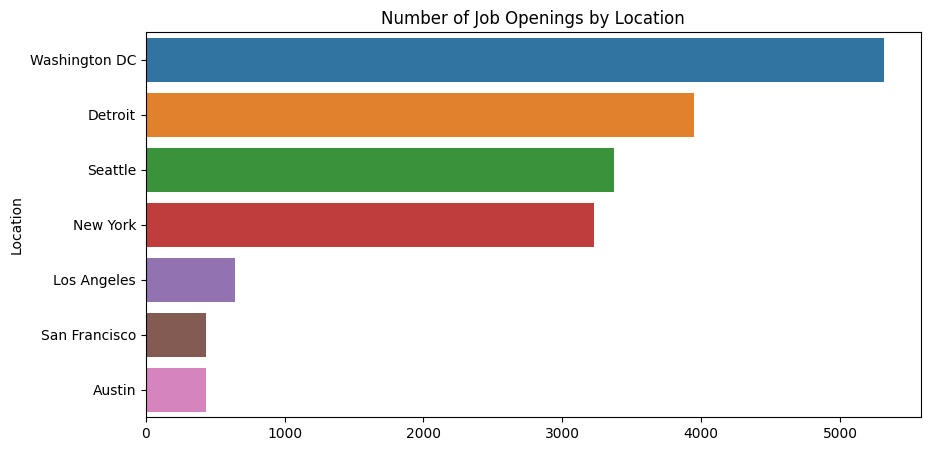

In [18]:
df1=df1.sort_values(by="Amount",ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=df1,y="Location",x="Amount",hue="Location")
plt.title("Number of Job Openings by Location")
plt.xlabel("");

In [19]:
#loop through so that function 1 is applied to each of the elements of list2, and then those stored values are passed to a dataframe
list2=['C ','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB']
technology=pd.Series()
count=pd.Series()
for i, x in enumerate (list2):
    technology[i], count[i]=funcion1(x)

dict=[{"Technology":x,"Amount":y}for x, y in zip(technology, count)]
df2=pd.DataFrame(dict)

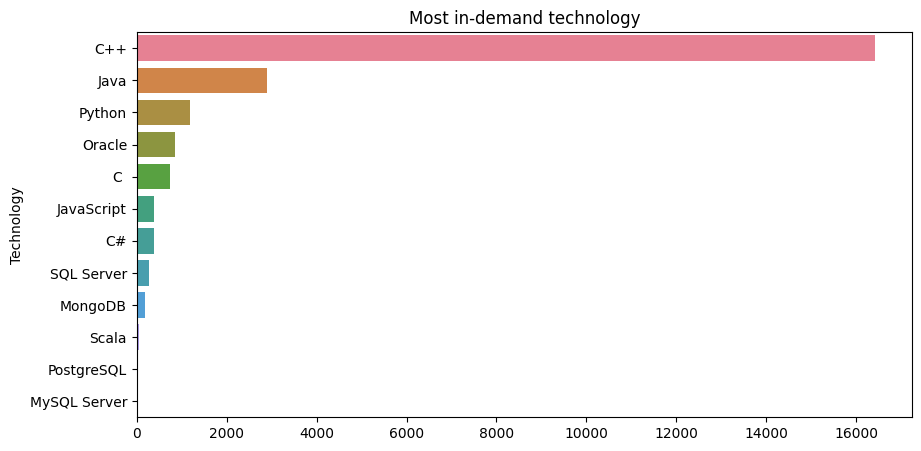

In [20]:
df2=df2.sort_values(by="Amount",ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=df2,y="Technology",x="Amount",hue="Technology")
plt.title("Most in-demand technology")
plt.xlabel("");

In [21]:
#Let's see how much experience is generally required to enter a job position, but we see that the column is in this format, so we need to work on it a little
df[["Job Experience Required"]].head(5)

Job Experience Required
0              5 - 10 yrs
1               2 - 5 yrs
2               0 - 1 yrs
3               0 - 5 yrs
4               2 - 5 yrs

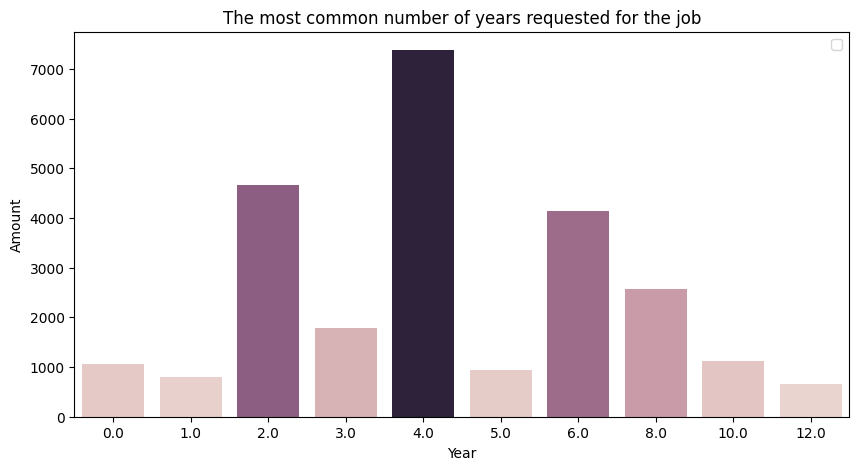

In [22]:
numeros_extraidos = df["Job Experience Required"].str.extractall(r'(\d+) - (\d+)') #extract the numbers from the cell

numeros_extraidos.columns = ['a', 'b'] #change column's names
numeros_extraidos[['a', 'b']]=numeros_extraidos[['a', 'b']].astype("int") #change the data type from object to integer

numeros_extraidos["c"]=round((numeros_extraidos["a"]+numeros_extraidos["b"])/2,0) #take the average between the 2 numbers

df4=numeros_extraidos["c"].value_counts().to_frame().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=df4,y="count",x="c",hue="count")
plt.title("The most common number of years requested for the job")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend("");

### Webscraping with beautifulsoup

In [23]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html'

r=requests.get(url).text

In [24]:
soup=BeautifulSoup(r,"html5lib")

In [25]:
soup.find_all(name="tr")

[<tr>
 <td>No.</td>
 <td>Language</td>
 <td>Created By</td>
 <td>Average Annual Salary</td>
 <td>Learning Difficulty</td>
 </tr>,
 <tr>
 <td>1</td>
 <td>Python</td>
 <td>Guido van Rossum</td>
 <td>$114,383</td>
 <td>Easy</td>
 </tr>,
 <tr>
 <td>2</td>
 <td>Java</td>
 <td>James Gosling</td>
 <td>$101,013</td>
 <td>Easy</td>
 </tr>,
 <tr>
 <td>3</td>
 <td>R</td>
 <td>Robert Gentleman, Ross Ihaka</td>
 <td>$92,037</td>
 <td>Hard</td>
 </tr>,
 <tr>
 <td>4</td>
 <td>Javascript</td>
 <td>Netscape</td>
 <td>$110,981</td>
 <td>Easy</td>
 </tr>,
 <tr>
 <td>5</td>
 <td>Swift</td>
 <td>Apple</td>
 <td>$130,801</td>
 <td>Easy</td>
 </tr>,
 <tr>
 <td>6</td>
 <td>C++</td>
 <td>Bjarne Stroustrup</td>
 <td>$113,865</td>
 <td>Hard</td>
 </tr>,
 <tr>
 <td>7</td>
 <td>C#</td>
 <td>Microsoft</td>
 <td>$88,726</td>
 <td>Hard</td>
 </tr>,
 <tr>
 <td>8</td>
 <td>PHP</td>
 <td>Rasmus Lerdorf</td>
 <td>$84,727</td>
 <td>Easy</td>
 </tr>,
 <tr>
 <td>9</td>
 <td>SQL</td>
 <td>Donald D. Chamberlin, Raymond F. Boy

In [26]:
for row in soup.find_all('tr'): #We are going to have a list where each element is a row, i.e., [<tr> </tr>,<tr> </tr>,...]. It is important to note that it does not distinguish between different tables, so if there are several tables, it will capture all the rows of all tables and mix them up

    cols = row.find_all('td') #And here we are going to have a list with the values of the nth row
    lang = cols[1].getText() #getText() extracts the text inside the tag, since otherwise it would be something like <td>text</td>.
    salary = cols[3].getText()
    print(f'Lang : {lang} -----> Sal : {salary}')

Lang : Language -----> Sal : Average Annual Salary
Lang : Python -----> Sal : $114,383
Lang : Java -----> Sal : $101,013
Lang : R -----> Sal : $92,037
Lang : Javascript -----> Sal : $110,981
Lang : Swift -----> Sal : $130,801
Lang : C++ -----> Sal : $113,865
Lang : C# -----> Sal : $88,726
Lang : PHP -----> Sal : $84,727
Lang : SQL -----> Sal : $84,793
Lang : Go -----> Sal : $94,082


#### Webscraping with pandas

In [27]:
list_df=pd.read_html(url,header=0) #With header=0, we are indicating that the table has headers. If it doesn't, we use header=None.

In [28]:
df5=list_df[0]
df5["Average Annual Salary"] = df5["Average Annual Salary"].str.replace(',', '').str.replace('$', '') #To be able to sort the dataframe, we need to remove the comma and the dollar sign.
df5["Average Annual Salary"] = df5["Average Annual Salary"].astype("int")

In [29]:
df5.sort_values(by="Average Annual Salary",ascending=False,inplace=True)
df5

No.    Language                                 Created By  \
4    5       Swift                                      Apple   
0    1      Python                           Guido van Rossum   
5    6         C++                          Bjarne Stroustrup   
3    4  Javascript                                   Netscape   
1    2        Java                              James Gosling   
9   10          Go  Robert Griesemer, Ken Thompson, Rob Pike.   
2    3           R               Robert Gentleman, Ross Ihaka   
6    7          C#                                  Microsoft   
8    9         SQL    Donald D. Chamberlin, Raymond F. Boyce.   
7    8         PHP                             Rasmus Lerdorf   

   Average Annual Salary Learning Difficulty  
4                 130801                Easy  
0                 114383                Easy  
5                 113865                Hard  
3                 110981                Easy  
1                 101013                Easy  
9                  94082           Difficult  
2                  92037                Hard  
6                  88726                Hard  
8                  84793                Easy  
7                  84727                Easy

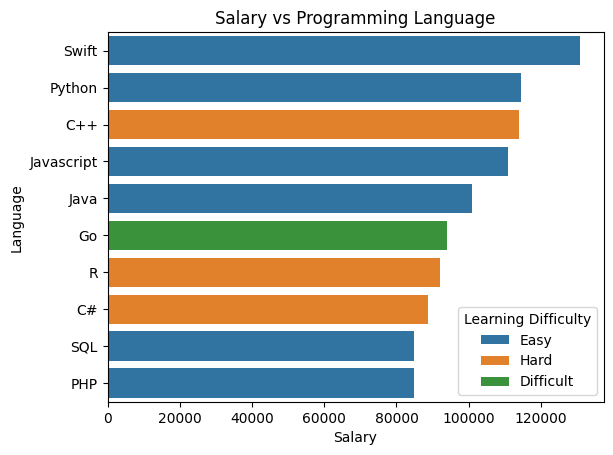

In [30]:
sns.barplot(data=df5,y="Language",x="Average Annual Salary",hue="Learning Difficulty")
plt.title("Salary vs Programming Language")
plt.xlabel("Salary");

### All subsequent work is based on a dataset generated from the interview conducted by Stack Overflow in the year 2019.

#If you want to learn more about this dataset, the following link will take you to a more detailed report:
https://stackoverflow.blog/2019/04/09/the-2019-stack-overflow-developer-survey-results-are-in/abs

This randomised subset contains around 1/10th of the original data set. Any conclusions after analyzing this subset may not reflect the real world scenario. But it's to demonstrate how data analysis is performed

In [31]:
df6=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

In [32]:
df6.head(3)

Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   

         Country Student                                            EdLevel  \
0  United States      No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1    New Zealand      No  Some college/university study without earning ...   
2  United States      No        Master’s degree (MA, MS, M.Eng., MBA, etc.)   

                                      UndergradMajor  ...  \
0  Computer science, computer engineering, or sof...  ...   
1  Computer science, computer engineering, or sof...  ...   
2  Computer science, computer engineering, or sof...  ...   

                              WelcomeChange  \
0   Just as welcome now as I felt last year   
1   Just as welcome now as I felt last year   
2  Somewhat more welcome now than last year   

                                        SONewContent   Age Gender Trans  \
0  Tech articles written by other developers;Indu...  22.0    Man    No   
1                                                NaN  23.0    Man    No   
2  Tech articles written by other developers;Cour...  28.0    Man    No   

                 Sexuality                     Ethnicity Dependents  \
0  Straight / Heterosexual  White or of European descent         No   
1                 Bisexual  White or of European descent         No   
2  Straight / Heterosexual  White or of European descent        Yes   

            SurveyLength                  SurveyEase  
0  Appropriate in length                        Easy  
1  Appropriate in length  Neither easy nor difficult  
2  Appropriate in length                        Easy  

[3 rows x 85 columns]

In [33]:
df6.shape #see that the dataframe has 11552 rows and 85 columns

(11552, 85)

In [34]:
df6.duplicated().sum() #The True values indicate duplicates, and this way we can see how many duplicate rows there are.

154

In [35]:
df6.drop_duplicates(inplace=True)

In [36]:
df6.shape

(11398, 85)

In [37]:
df6.info() #see that there are many NaN values.

<class 'pandas.core.frame.DataFrame'>
Index: 11398 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null  obj

In [38]:
df6.isnull().sum().to_frame().sort_values(by=0,ascending=False) #Here we can observe those columns that have the highest number of NaN values

0
BlockchainIs        2610
CodeRevHrs          2426
BlockchainOrg       2322
MiscTechWorkedWith  2182
SONewContent        1965
...                  ...
JobSeek                0
MainBranch             0
LastHireDate           0
CurrencySymbol         0
Respondent             0

[85 rows x 1 columns]

#### We are going to work with a dataframe similar to the previous one but removing the columns that we are not going to use

In [39]:
df61=df6[[
    "Respondent",
    "MainBranch",
    "Hobbyist",
    "Employment",
    "Country",
    "Student",
    "EdLevel",
    "UndergradMajor",
    "OrgSize",
    "DevType",
    "YearsCode",
    "Age1stCode",
    "CareerSat",
    "JobSat",
    "MgrMoney",
    "JobSeek",
    "JobFactors",
    "ResumeUpdate",
    "ConvertedComp",
    "WorkWeekHrs",
    "WorkChallenge",
    "WorkLoc",
    "ImpSyn",
    "CodeRev",
    "CodeRevHrs",
    "LanguageWorkedWith",
    "LanguageDesireNextYear",
    "DatabaseWorkedWith",
    "DatabaseDesireNextYear",
    "PlatformWorkedWith",
    "PlatformDesireNextYear",
    "WebFrameWorkedWith",
    "WebFrameDesireNextYear",
    "MiscTechWorkedWith",
    "MiscTechDesireNextYear",
    "OpSys",
    "BetterLife",
    "OffOn",
    "SocialMedia",
    "Extraversion",
    "Age",
    "Gender"
]].copy()

In [40]:
df61.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11398 entries, 0 to 11551
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   Employment              11398 non-null  object 
 4   Country                 11398 non-null  object 
 5   Student                 11347 non-null  object 
 6   EdLevel                 11286 non-null  object 
 7   UndergradMajor          10661 non-null  object 
 8   OrgSize                 11302 non-null  object 
 9   DevType                 11333 non-null  object 
 10  YearsCode               11389 non-null  object 
 11  Age1stCode              11385 non-null  object 
 12  CareerSat               11398 non-null  object 
 13  JobSat                  11397 non-null  object 
 14  MgrMoney                10901 non-null  obj

#### This graph shows us how the ages are distributed in our datase

Both graphs show the same thing, only the second one is more zoomed in on the area of highest frequency to better visualize it.

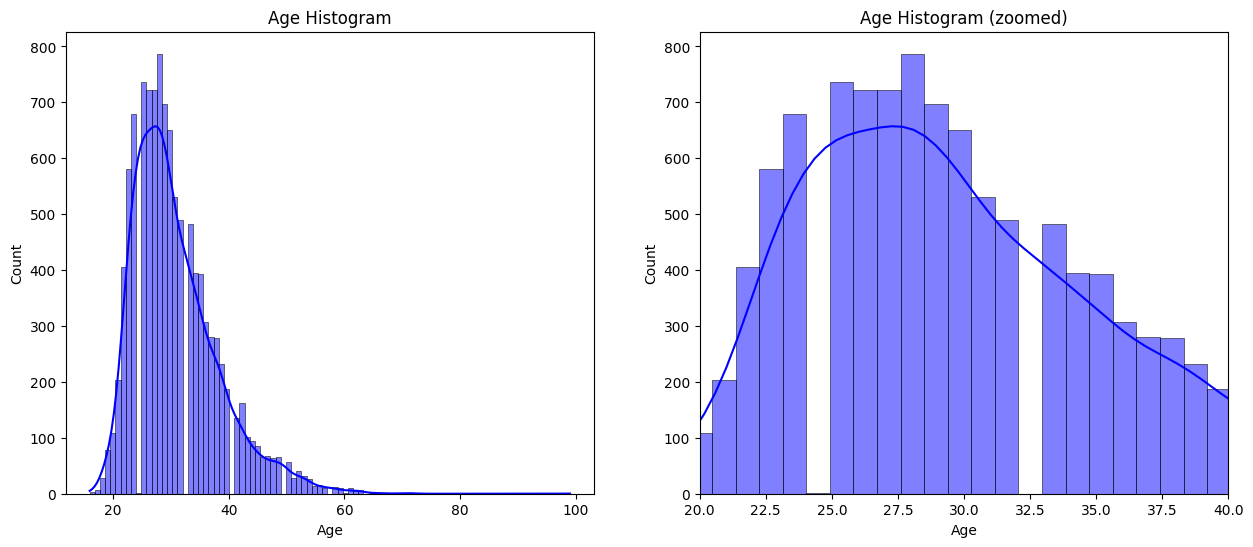

In [41]:
data = df61['Age'].dropna()

fig = plt.figure(figsize=(15, 6))

axs1=fig.add_subplot(1,2,1) 
sns.histplot(data, kde=True, color='blue',ax=axs1)
axs1.set_title("Age Histogram")

axs2=fig.add_subplot(1,2,2)
sns.histplot(data, kde=True, color='blue',ax=axs2)
plt.xlim(20,40)
axs2.set_title("Age Histogram (zoomed)");

In [42]:
df61["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Most of the respondents are approximately 30 years old or close ages.

#### This graph shows the gender of the respondents

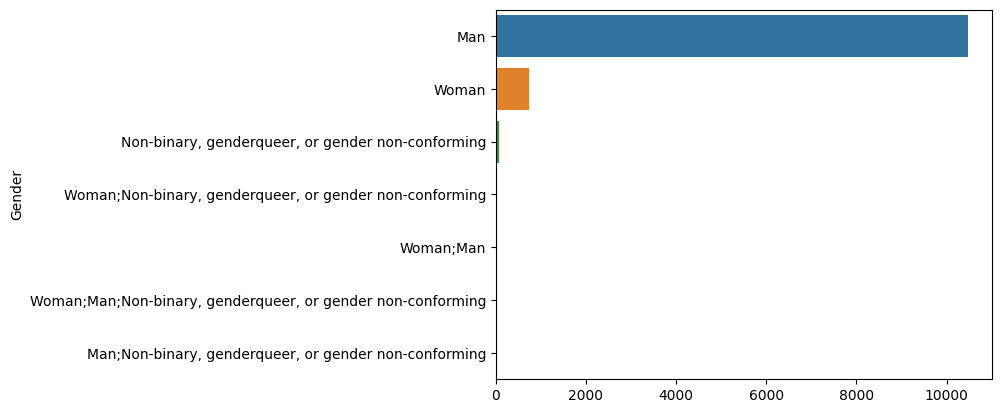

In [43]:
sns.countplot(data=df61, y="Gender", hue="Gender")
plt.xlabel("")
plt.legend().remove()

In [44]:
df61["Gender"].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

We can observe that the majority of respondents are male, so conducting any analysis regarding genders wouldn't be appropriate

#### From the next graph, you will be able to see the countries of the respondents

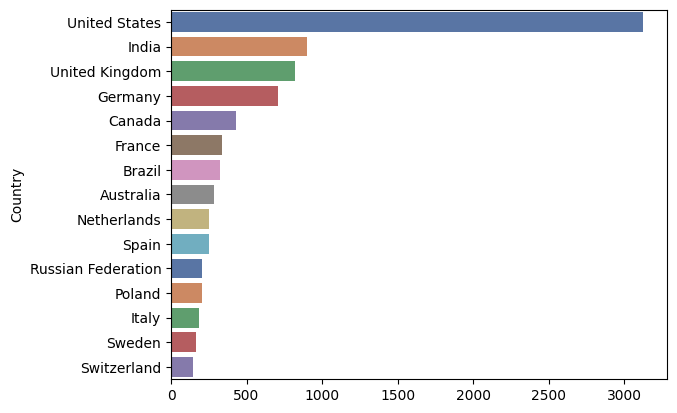

In [45]:
data=df61["Country"].value_counts().head(15).to_frame()
mi_paleta = sns.color_palette("deep", 15)

sns.barplot(data=data, y="Country",x="count",hue="Country",palette=mi_paleta)
plt.xlabel("");

#### Vamos a trabajar con algunas columnas del df que tienen valores faltantes o valores incorrectos

In [46]:
#fill UndergradMajor column with most frequent value
value=df61["UndergradMajor"].value_counts().idxmax()
df61["UndergradMajor"].replace(np.nan,value,inplace=True)

#fill MgrMoney column with "Not Sure"
value1=df61["MgrMoney"].value_counts().idxmin()
df61["MgrMoney"].replace(np.nan,value1,inplace=True)


#replace the text "Less than 1 year" with 0.5 in the "YearsCode" column
df61["YearsCode"].replace("Less than 1 year",0.5,inplace=True)
# Convert the column to float type
df61['YearsCode'] = df61['YearsCode'].astype(float)
#We replace the text "Younger than 5 years" with 4 in the "Age1stCode" column.
df61["Age1stCode"].replace("Younger than 5 years",4,inplace=True)
# Convert the column to float type.
df61['Age1stCode'] = df61['Age1stCode'].astype(float)

### Let's analyze those most important numerical variables to see their distribution and if there are outliers that may affect the analysis.

##### Column "ConvertedComp"

Shows the annual salary of the respondents.

In [47]:
#We obtain the quartiles.
Q1 = df61['ConvertedComp'].quantile(0.25)
Q3 = df61['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
#Upper and lower bound formulas
lim_inf=Q1 - (1.5 * (Q3 - Q1))
lim_sup=Q3 + (1.5 * (Q3 - Q1))

print("MAX",df61['ConvertedComp'].max(),"\n",
      "MIN",df61['ConvertedComp'].min(),"\n",
      "MEAN",df61['ConvertedComp'].mean(),"\n", 
      "MEDIAN",df61['ConvertedComp'].median(),"\n",
      "1° Quartil:", Q1,"\n",
      "3° Quartil:", Q3,"\n",
      "IQR:", IQR,"\n",
      "Lower Bound:", lim_inf,"\n", 
      "Upper Bound:", lim_sup)

MAX 2000000.0 
 MIN 0.0 
 MEAN 131596.7316197316 
 MEDIAN 57745.0 
 1° Quartil: 26868.0 
 3° Quartil: 100000.0 
 IQR: 73132.0 
 Lower Bound: -82830.0 
 Upper Bound: 209698.0


We can see that the mean is affected by the outliers, so we will use the median to replace the NaN values.

See that the lower bound is negative but there are no negative values, which tells us that there are outliers or an asymmetric distribution, and also in the boxplot the minimum value will appear as the lower bound, if there are no values greater than the calculated lower bound.

See that the upper bound is approximately 200k and the maximum value is 2M, which tells us that there are outliers or a right-skewed distribution.

#### The aforementioned can be observed in the following graphs

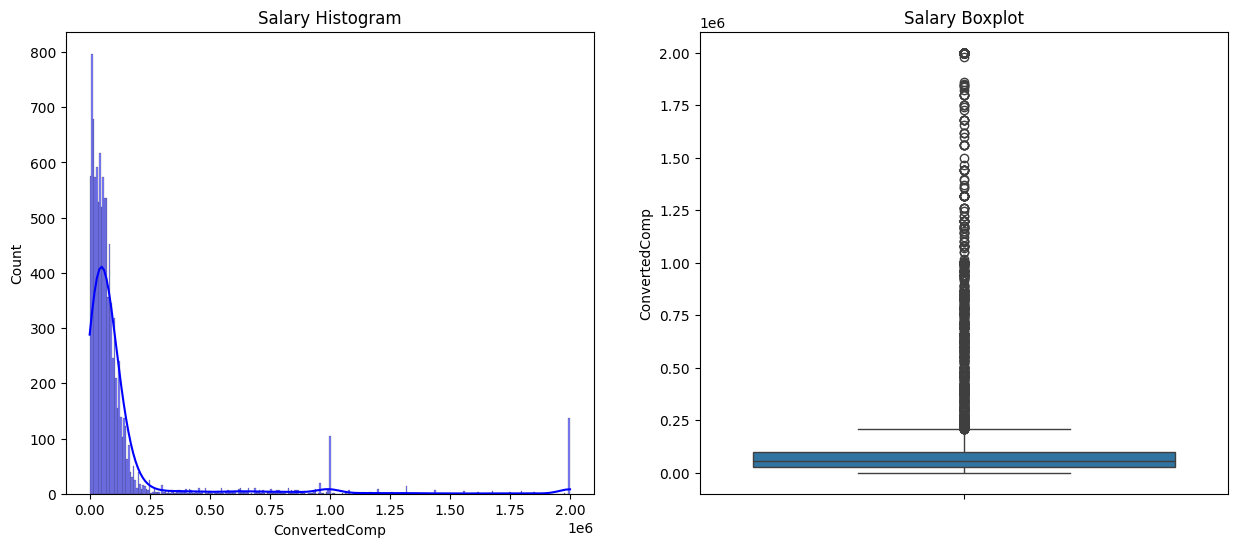

In [48]:
data = df61['ConvertedComp'].dropna()
fig = plt.figure(figsize=(15, 6))

axs1=fig.add_subplot(1,2,1) 
sns.histplot(data, kde=True, color='blue',ax=axs1)
axs1.set_title("Salary Histogram")

axs2=fig.add_subplot(1,2,2)
sns.boxplot(df61["ConvertedComp"],ax=axs2)
axs2.set_title("Salary Boxplot");

In [49]:
cant_outliers=len(df61[['ConvertedComp']].query("`ConvertedComp`< @lim_inf | `ConvertedComp`> @lim_sup "))
print("Number of outliers:",cant_outliers)

Number of outliers: 879


In [50]:
df61[['ConvertedComp']].query("`ConvertedComp`< @lim_inf | `ConvertedComp`> @lim_sup ").value_counts().head(15)

ConvertedComp
2000000.0        138
1000000.0        105
250000.0          17
1320000.0         14
300000.0          13
962424.0          10
220000.0          10
1200000.0          9
628068.0           8
687444.0           8
230000.0           8
618708.0           8
210000.0           8
1440000.0          7
942096.0           7
Name: count, dtype: int64

We see that there are many values of 1M and 2M, these values can hinder the analysis.

##### Column "CodeRevHrs"

Respond to the question, how many hours per week do you spend on code review?

In [51]:
Q1 = df61['CodeRevHrs'].quantile(0.25)
Q3 = df61['CodeRevHrs'].quantile(0.75)

IQR = Q3 - Q1

lim_inf1=Q1 - (1.5 * (Q3 - Q1)) 
lim_sup1=Q3 + (1.5 * (Q3 - Q1))

print("MAX",df61['CodeRevHrs'].max(),"\n",
      "MIN",df61['CodeRevHrs'].min(),"\n",
      "MEAN",df61['CodeRevHrs'].mean(),"\n",
      "MEDIAN",df61['CodeRevHrs'].median(),"\n",
      "1° Quartil:", Q1,"\n",
      "3° Quartil:", Q3,"\n",
      "IQR:", IQR,"\n",
      "Lower Bound:", lim_inf1,"\n",
      "Upper Bound:", lim_sup1)

MAX 99.0 
 MIN 0.0 
 MEAN 4.781071110120375 
 MEDIAN 4.0 
 1° Quartil: 2.0 
 3° Quartil: 5.0 
 IQR: 3.0 
 Lower Bound: -2.5 
 Upper Bound: 9.5


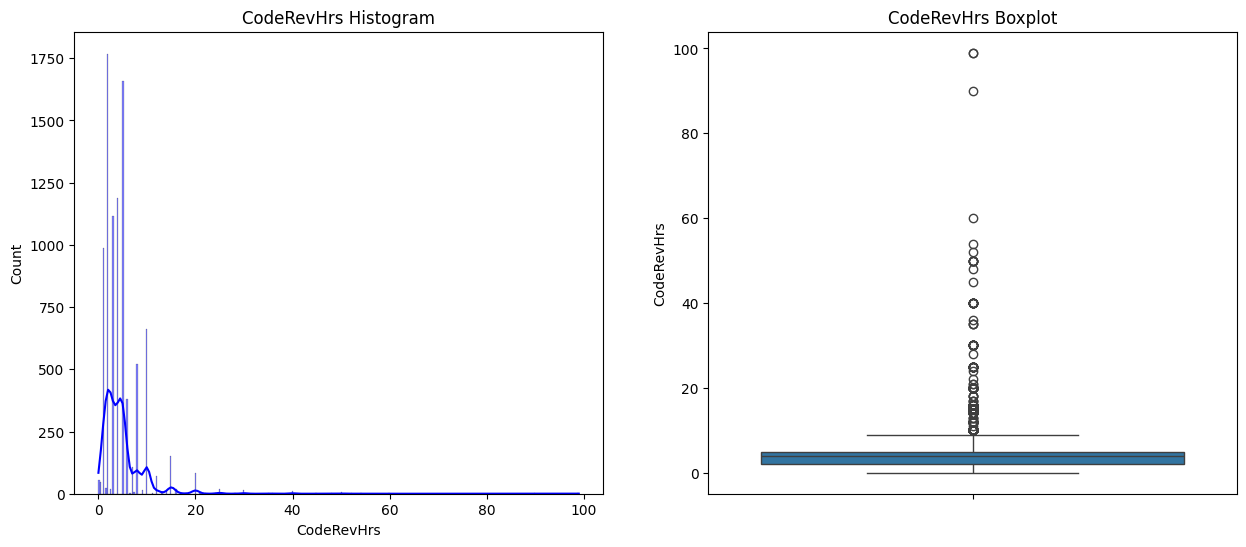

In [52]:
data = df61['CodeRevHrs'].dropna()
fig = plt.figure(figsize=(15, 6))

axs1=fig.add_subplot(1,2,1) 
sns.histplot(data, kde=True, color='blue',ax=axs1)
axs1.set_title("CodeRevHrs Histogram")

axs2=fig.add_subplot(1,2,2)
sns.boxplot(df61["CodeRevHrs"],ax=axs2)
axs2.set_title("CodeRevHrs Boxplot");

#### Replace the NA values in certain columns with their median

In [53]:
#obtain the median of the "ConvertedComp" column.
value2=df61["ConvertedComp"].median()
#replace the NA values with the median. We use the median because it is less affected by outliers
df61["ConvertedComp"].replace(np.nan,value2,inplace=True)

#obtain the median of the "CodeRevHrs" column
value3=df61["CodeRevHrs"].median()
#replace the NA values with the median. We use the median because it is less affected by outliers
df61["CodeRevHrs"].replace(np.nan,value3,inplace=True)

### Remove the outliers from the "ConvertedComp" column of our dataset

In [54]:
df611=df61.query("`ConvertedComp`> @lim_inf and `ConvertedComp`< @lim_sup").reset_index(drop=True)

## Let's visualize characteristics of the dataset to determine insights or relevant issues

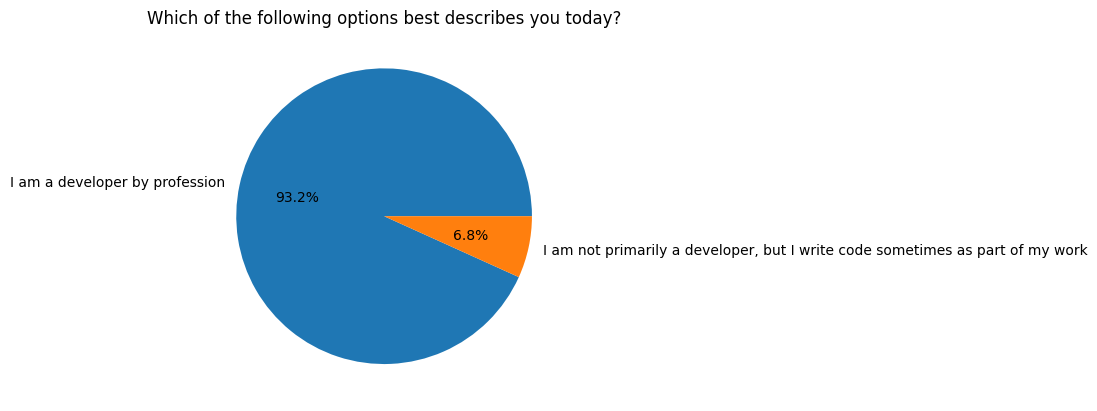

In [55]:
data=df611["MainBranch"].value_counts().to_frame().reset_index()
plt.pie(data["count"],labels=data["MainBranch"],autopct='%1.1f%%')
plt.title("Which of the following options best describes you today?");

It can be said that the majority of respondents are primarily developers.

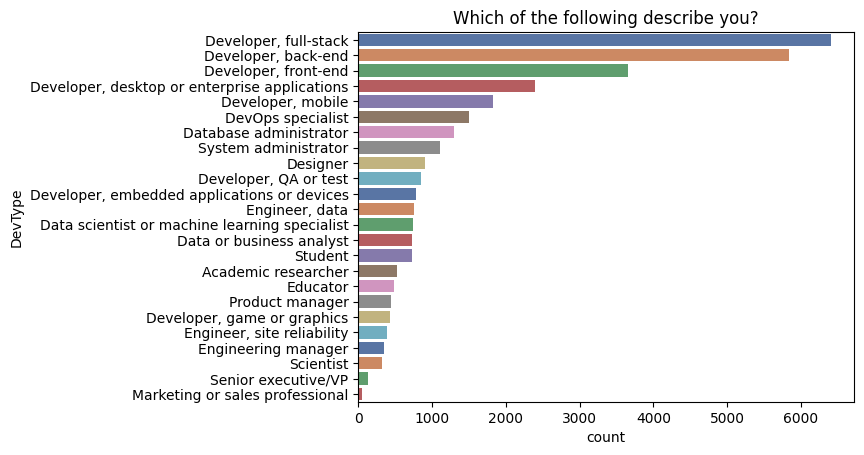

In [56]:
data = df611["DevType"].str.split(";")

# Usar explode para convertir la lista de categorías en filas separadas
dfff_exploded = data.explode("DevType").to_frame()

# Contar las categorías individuales
count_data=dfff_exploded["DevType"].value_counts().to_frame()

mi_paleta = sns.color_palette("deep", 24)

sns.barplot(data=count_data,y="DevType",x="count",hue="DevType",palette=mi_paleta)
plt.title("Which of the following describe you?");

It can be observed that the majority of respondents are full stack, back-end, and front-end developers.

### Now let's visualize some features regarding certain aspects of developer's work.

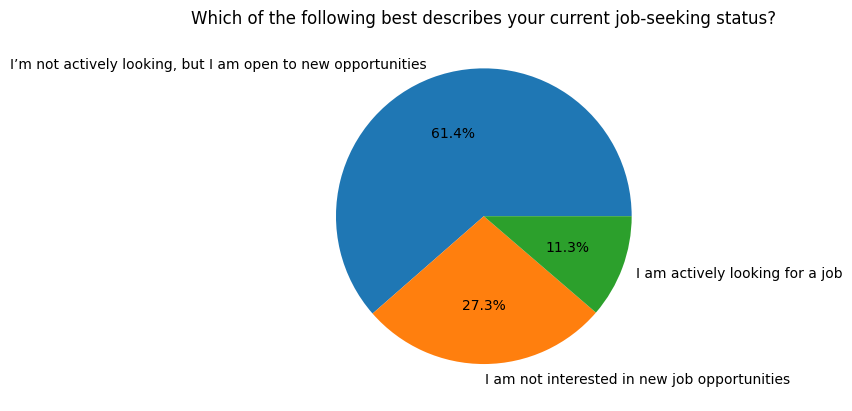

In [57]:
data=df611["JobSeek"].value_counts().to_frame().reset_index()
plt.pie(data["count"],labels=data["JobSeek"],autopct='%1.1f%%')
plt.title("Which of the following best describes your current job-seeking status?");

We can see that approximately 73% of the respondents view a new job opportunity positively, while 27% are not currently looking for a job.

In [58]:
data=df611.groupby(["JobSeek","JobSat"],as_index=False).size()

fig = px.sunburst(data, path=['JobSeek', 'JobSat'], values='size',title='Job Satisfaction by Job Seek Status')
fig

From the previous graph, we can see a difference between those who are not looking for a job and those who are open to new opportunities. 

Of those who are not looking for a job, approximately 85% are satisfied with their current job and 15% are not satisfied. 

Of those who are not actively looking but are open, approximately 60% are satisfied and 40% are not. 

And finally, among those who are actively looking, there is the greatest difference, where approximately 30% are satisfied and 70% are not.

In [59]:
df611["JobFactors"].value_counts().to_frame().head(5)
# see that there are several options, so we need to split to perform an individual count of the options

count
JobFactors                                               
Languages, frameworks, and other technologies I...    778
Languages, frameworks, and other technologies I...    730
Languages, frameworks, and other technologies I...    617
Languages, frameworks, and other technologies I...    487
Office environment or company culture;Opportuni...    485

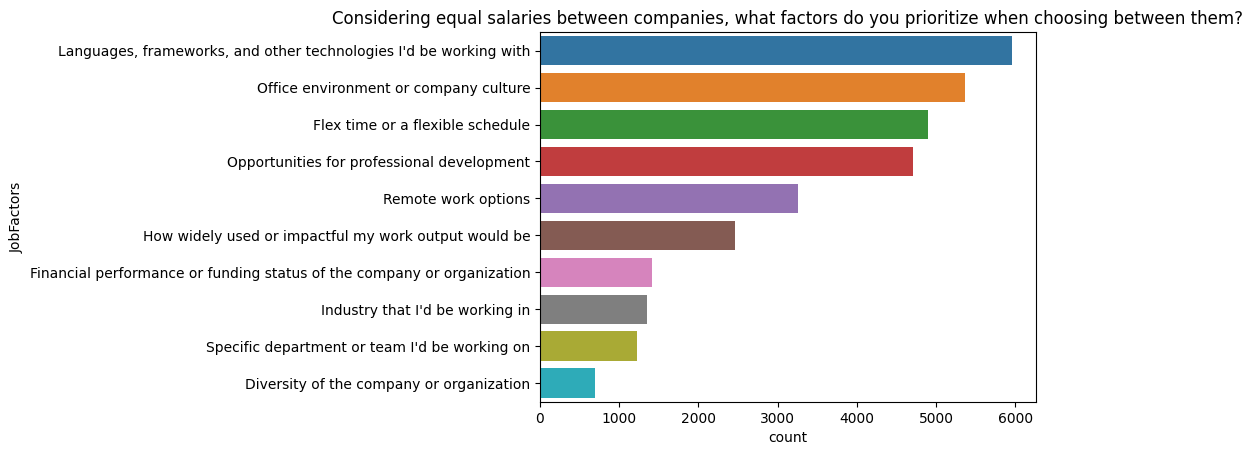

In [83]:
# Split the strings and convert them into lists of categories
data = df611["JobFactors"].str.split(";")

# Use explode to convert the list of categories into separate rows
dfff_exploded = data.explode("JobFactors").to_frame()

count_data=dfff_exploded["JobFactors"].value_counts().to_frame()

sns.barplot(data=count_data,y="JobFactors",x="count",hue="JobFactors")
plt.title("Considering equal salaries between companies, what factors do you prioritize when choosing between them?");

We can see that for the respondents, when faced with equal salary, benefits, and location between two job positions, the most important factors are the languages, frameworks, technologies, the work environment, and the flexibility of working hours in which they will be immersed in their work.

In [61]:
df611["WorkChallenge"].value_counts().to_frame().head(5)

count
WorkChallenge                                            
Being tasked with non-development work;Distract...    348
Being tasked with non-development work;Meetings...    299
Distracting work environment;Meetings;Not enoug...    241
Being tasked with non-development work;Distract...    220
Distracting work environment;Meetings;Time spen...    207

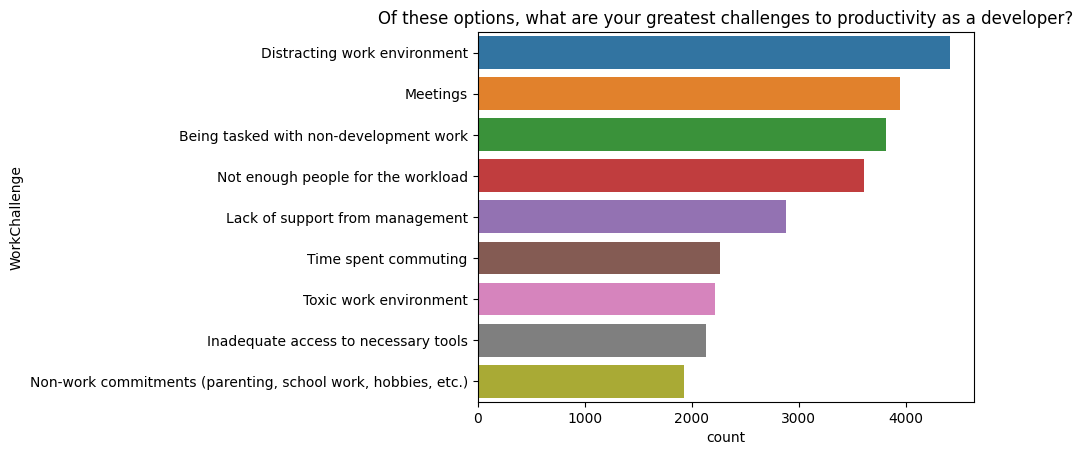

In [62]:
data = df611["WorkChallenge"].str.split(";")

dfff_exploded = data.explode("WorkChallenge").to_frame()

count_data=dfff_exploded["WorkChallenge"].value_counts().to_frame()

sns.barplot(data=count_data,y="WorkChallenge",x="count",hue="WorkChallenge")
plt.title("Of these options, what are your greatest challenges to productivity as a developer?");

According to the respondents, the biggest challenges regarding their efficiency are the distracting environment and constant meetings.

In [63]:
count_data=df611["ResumeUpdate"].value_counts().to_frame().reset_index()

fig=go.Figure(data=go.Pie(labels=count_data["ResumeUpdate"], values=count_data["count"]))
fig.update_layout(title='Most frequent reasons to update a CV',legend_title_text='Reasons')

### Let's find out if there is any relationship between the numerical variables in the dataset.

In [64]:
data=df611.select_dtypes(include='number') #To extract from the dataframe those columns of numeric type.
data.corr()

Respondent  YearsCode  Age1stCode  ConvertedComp  WorkWeekHrs  \
Respondent       1.000000   0.001968    0.004871       0.010525    -0.015275   
YearsCode        0.001968   1.000000   -0.365094       0.377692     0.030126   
Age1stCode       0.004871  -0.365094    1.000000      -0.137118    -0.011313   
ConvertedComp    0.010525   0.377692   -0.137118       1.000000     0.033469   
WorkWeekHrs     -0.015275   0.030126   -0.011313       0.033469     1.000000   
CodeRevHrs       0.001792  -0.023958    0.035264      -0.064450     0.030142   
Age              0.003950   0.790924   -0.041431       0.386628     0.037452   

               CodeRevHrs       Age  
Respondent       0.001792  0.003950  
YearsCode       -0.023958  0.790924  
Age1stCode       0.035264 -0.041431  
ConvertedComp   -0.064450  0.386628  
WorkWeekHrs      0.030142  0.037452  
CodeRevHrs       1.000000 -0.014431  
Age             -0.014431  1.000000

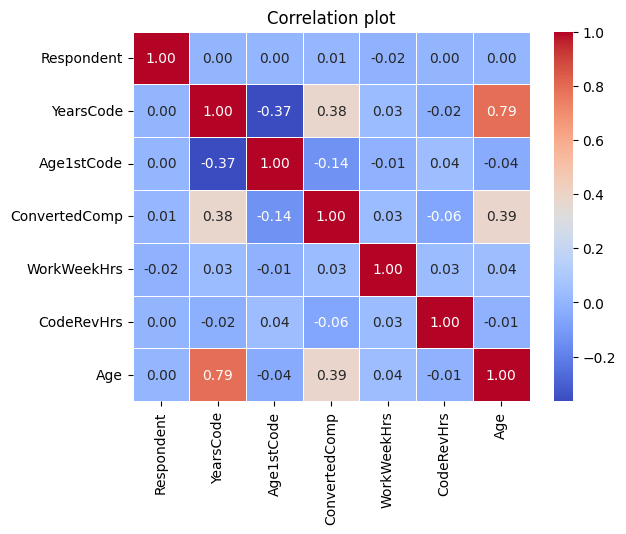

In [65]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation plot");

The most important relationship we can see is between salary and the number of years the respondent/developer has been working, which in some way is logical.

We can observe this relationship in the subsequent graph, where the salary increases with greater experience/years of coding.

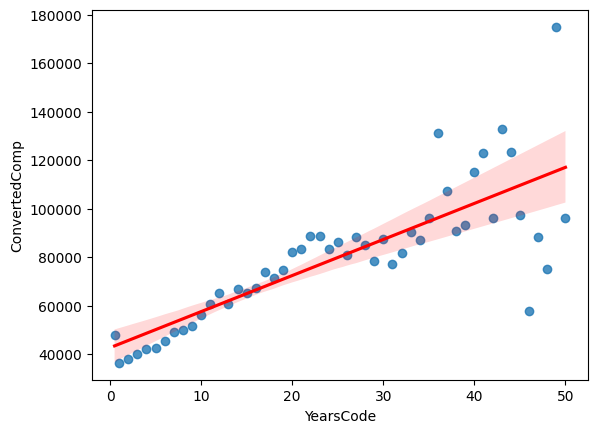

In [66]:
df_group=df611.groupby("YearsCode",as_index=False)["ConvertedComp"].mean()
sns.regplot(data=df_group,x="YearsCode",y="ConvertedComp",line_kws={"color": "red"});

In [67]:
data_1=df611.dropna(axis=0)
pearson_coef, p_value = stats.pearsonr(data_1['YearsCode'], data_1['ConvertedComp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.38547239431840047  with a P-value of P = 1.2013868576916778e-177


Since the p-value is less than 0.001, we can say that this correlation is significant or has statistical significance.

### Let's now analyze some categorical variables with respect to the salary of the respondents.

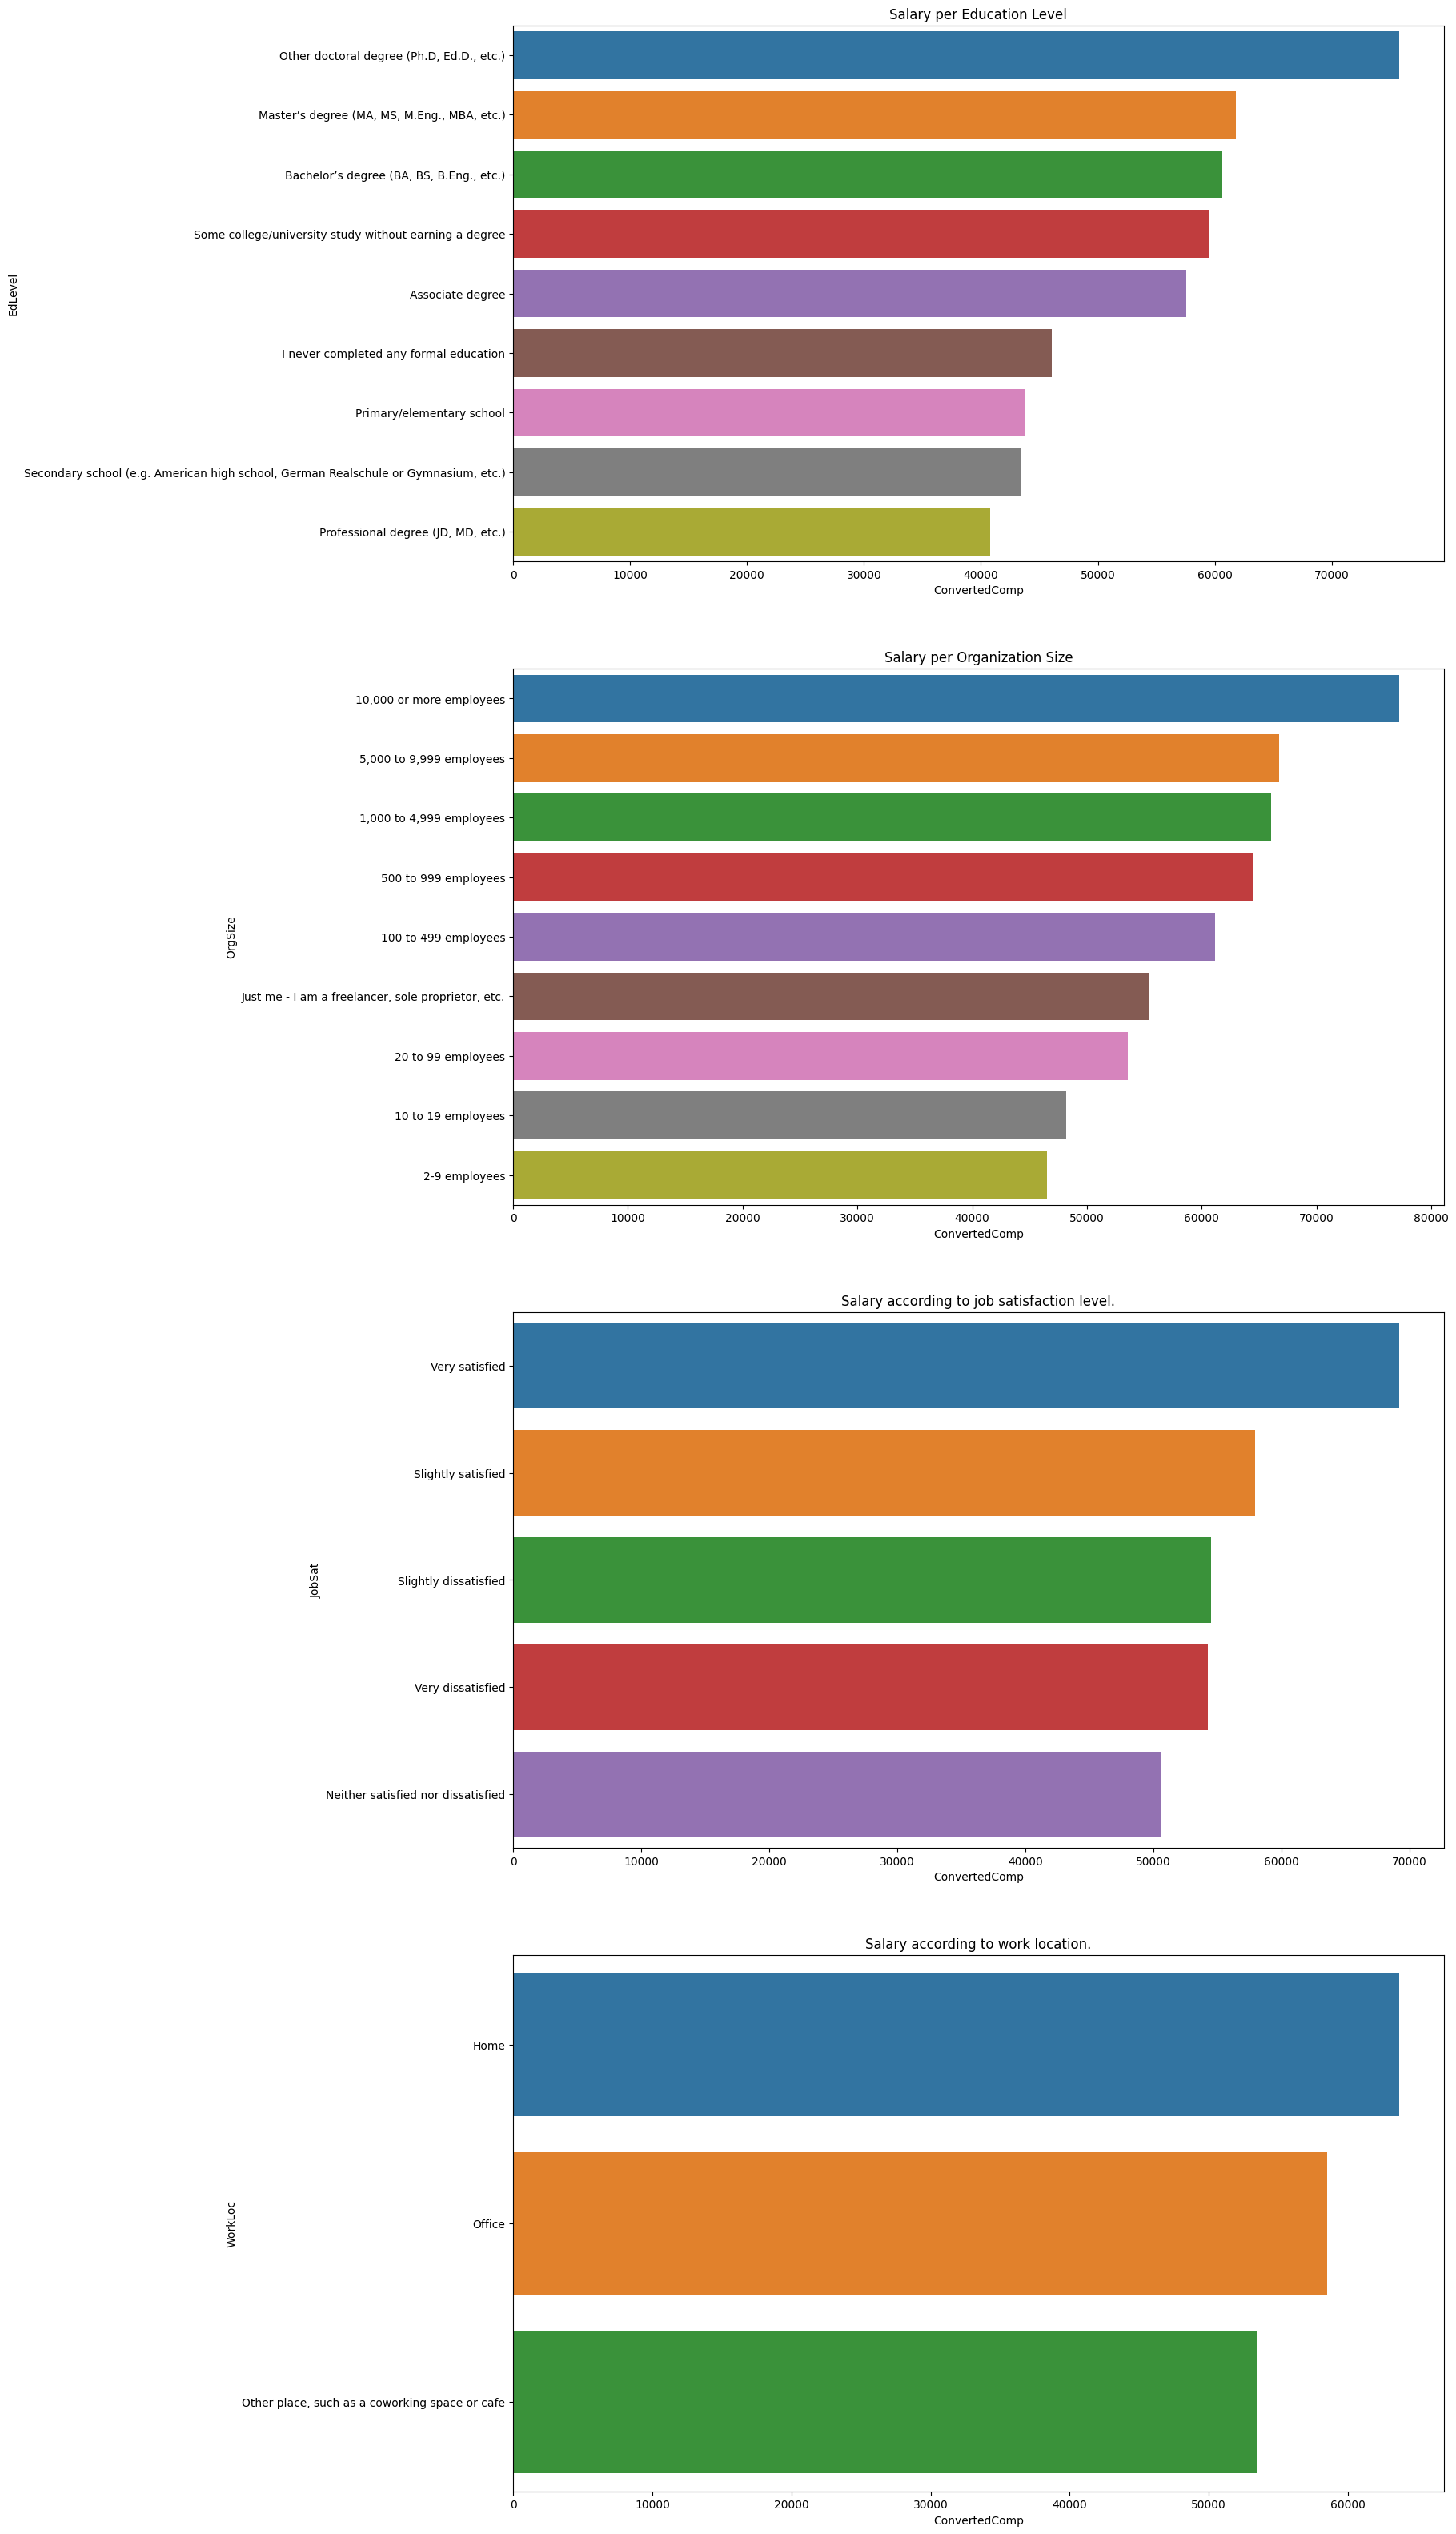

In [68]:
#esto habria q separarlo para agregarle texto o conclusiones de los gráficos.., asi se ve muy feo y no podes dar conclusiones caras

fig = plt.figure(figsize=(15, 40))

axs1=fig.add_subplot(4,1,1) 
sns.barplot(data=df611.groupby("EdLevel",as_index=False)["ConvertedComp"].mean().sort_values(by="ConvertedComp",ascending=False),x="ConvertedComp",y="EdLevel",ax=axs1,hue="EdLevel")
axs1.set_title("Salary per Education Level")

axs2=fig.add_subplot(4,1,2) 
sns.barplot(data=df611.groupby("OrgSize",as_index=False)["ConvertedComp"].mean().sort_values(by="ConvertedComp",ascending=False),x="ConvertedComp",y="OrgSize",ax=axs2,hue="OrgSize")
axs2.set_title("Salary per Organization Size")

axs4=fig.add_subplot(4,1,3) 
sns.barplot(data=df611.groupby("JobSat",as_index=False)["ConvertedComp"].mean().sort_values(by="ConvertedComp",ascending=False),x="ConvertedComp",y="JobSat",ax=axs4,hue="JobSat")
axs4.set_title("Salary according to job satisfaction level.")

axs5=fig.add_subplot(4,1,4) 
sns.barplot(data=df611.groupby("WorkLoc",as_index=False)["ConvertedComp"].mean().sort_values(by="ConvertedComp",ascending=False),x="ConvertedComp",y="WorkLoc",ax=axs5,hue="WorkLoc")
axs5.set_title("Salary according to work location.");



Some conclusions we can draw from the previous graphs:
- The higher the level of education, the higher the salary.
- Larger companies pay more.
- Higher satisfaction could imply a higher salary.
- Those who work from home, in this case, have a higher average salary compared to those who work from the office.

##### The following graph shows boxplots, representing the distribution of different satisfaction categories in relation to salary.

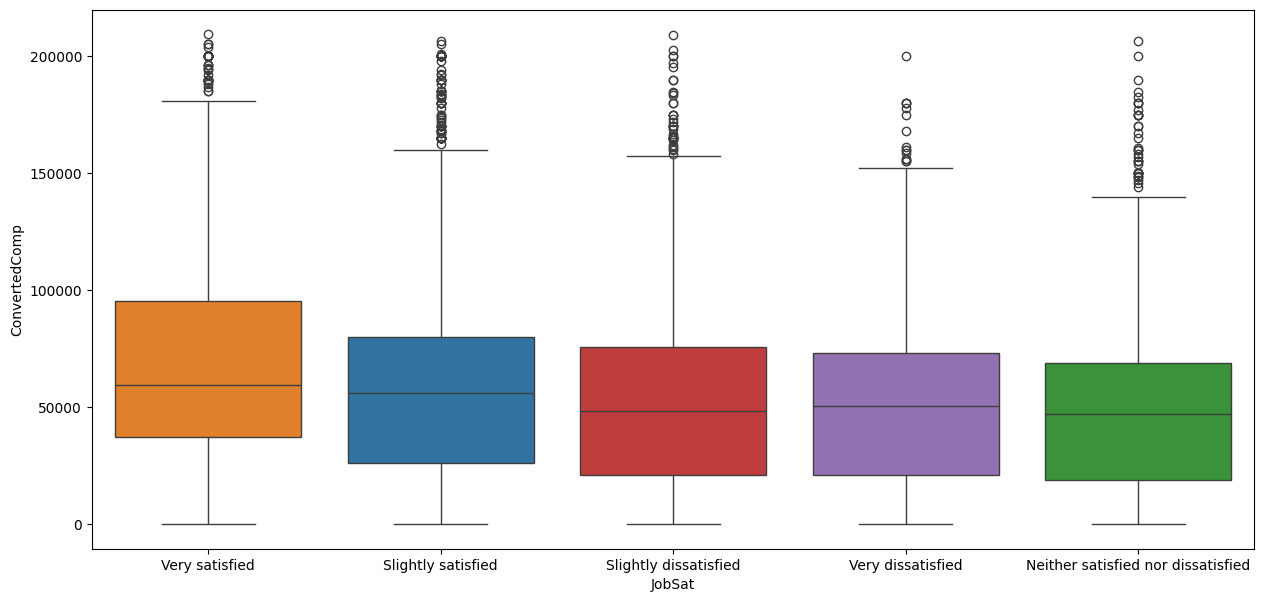

In [69]:
fig = plt.figure(figsize=(15, 7))

edlevel_order = ['Very satisfied', 'Slightly satisfied', 'Slightly dissatisfied', 'Very dissatisfied', 'Neither satisfied nor dissatisfied']

axs2=fig.add_subplot(1,1,1) 
sns.boxplot(data=df611,x="JobSat",y="ConvertedComp",ax=axs2,hue="JobSat",order=edlevel_order)
plt.legend().remove();


## Now we're working with an SQLite database and using magic statements.

In [70]:
%load_ext sql 
#To load the extension in the notebook.

In [71]:
conn=sqlite3.connect("m4_survey_data.sqlite") #We create the connect object.

In [72]:
%sql sqlite:///m4_survey_data.sqlite 
#connect to the database. After this, we can already perform queries with SQL language.

#### Perform some queries to the database.

In [73]:
%%sql     

select type,name
from sqlite_master
where type == "table"

 * sqlite:///m4_survey_data.sqlite
Done.


[('table', 'EduOther'),
 ('table', 'DevType'),
 ('table', 'LastInt'),
 ('table', 'JobFactors'),
 ('table', 'WorkPlan'),
 ('table', 'WorkChallenge'),
 ('table', 'LanguageWorkedWith'),
 ('table', 'LanguageDesireNextYear'),
 ('table', 'DatabaseWorkedWith'),
 ('table', 'DatabaseDesireNextYear'),
 ('table', 'PlatformWorkedWith'),
 ('table', 'PlatformDesireNextYear'),
 ('table', 'WebFrameWorkedWith'),
 ('table', 'WebFrameDesireNextYear'),
 ('table', 'MiscTechWorkedWith'),
 ('table', 'MiscTechDesireNextYear'),
 ('table', 'DevEnviron'),
 ('table', 'Containers'),
 ('table', 'SOVisitTo'),
 ('table', 'SONewContent'),
 ('table', 'Gender'),
 ('table', 'Sexuality'),
 ('table', 'Ethnicity'),
 ('table', 'master')]

In [74]:
%%sql
select upper(SocialMedia) as SocialMedia, count(*) as recount, (select count(distinct(Respondent)) from master) as total_respondent, (count(*)*100/(select count(distinct(Respondent)) from master)) as percentage_of_total
from master
where Age >(select avg(Age) from master)
group by SocialMedia
having recount > 500
order by recount desc

 * sqlite:///m4_survey_data.sqlite
Done.


[('TWITTER', 901, 11398, 7),
 ('FACEBOOK', 816, 11398, 7),
 ('REDDIT', 772, 11398, 6),
 ('WHATSAPP', 692, 11398, 6),
 ('YOUTUBE', 517, 11398, 4)]

In [75]:
%%sql

select SocialMedia,count(*) as recuento
from master
where  Age > (select avg(Age) from master where ConvertedComp > (select avg(ConvertedComp) from master))

 * sqlite:///m4_survey_data.sqlite
Done.


[('Facebook', 3197)]

In [76]:
%%sql

select LanguageWorkedWith,count(*) as recount, round(avg(ConvertedComp)) as avg_salary
from master as mas JOIN  LanguageWorkedWith as lang
ON mas.Respondent = lang.Respondent
group by LanguageWorkedWith
having recount > 2000
order by avg_salary desc

 * sqlite:///m4_survey_data.sqlite
Done.


[('Python', 4542, 148139.0),
 ('Bash/Shell/PowerShell', 4642, 147646.0),
 ('C#', 4288, 134098.0),
 ('JavaScript', 8687, 132210.0),
 ('HTML/CSS', 7830, 131627.0),
 ('SQL', 7106, 131445.0),
 ('TypeScript', 3232, 130062.0),
 ('Java', 4506, 123083.0),
 ('PHP', 2913, 116476.0)]

In [77]:
%%sql

select DevType,count(*) as recount,round(avg(ConvertedComp)) as avg_salary
from master as mas JOIN  DevType as lang
ON mas.Respondent = lang.Respondent
group by DevType
having recount > 1000
order by avg_salary desc

 * sqlite:///m4_survey_data.sqlite
Done.


[('DevOps specialist', 1639, 149393.0),
 ('System administrator', 1202, 136851.0),
 ('Database administrator', 1413, 133445.0),
 ('Developer, full-stack', 6928, 133087.0),
 ('Developer, back-end', 6290, 123459.0),
 ('Developer, desktop or enterprise applications', 2575, 122851.0),
 ('Developer, front-end', 3920, 122783.0),
 ('Developer, mobile', 1959, 107399.0)]

### The following analysis will be done to show the most used and most desired technologies for future years by the respondents, in this way, trying to understand what the future holds in the IT industry.

 * sqlite:///m4_survey_data.sqlite
Done.
 * sqlite:///m4_survey_data.sqlite
Done.


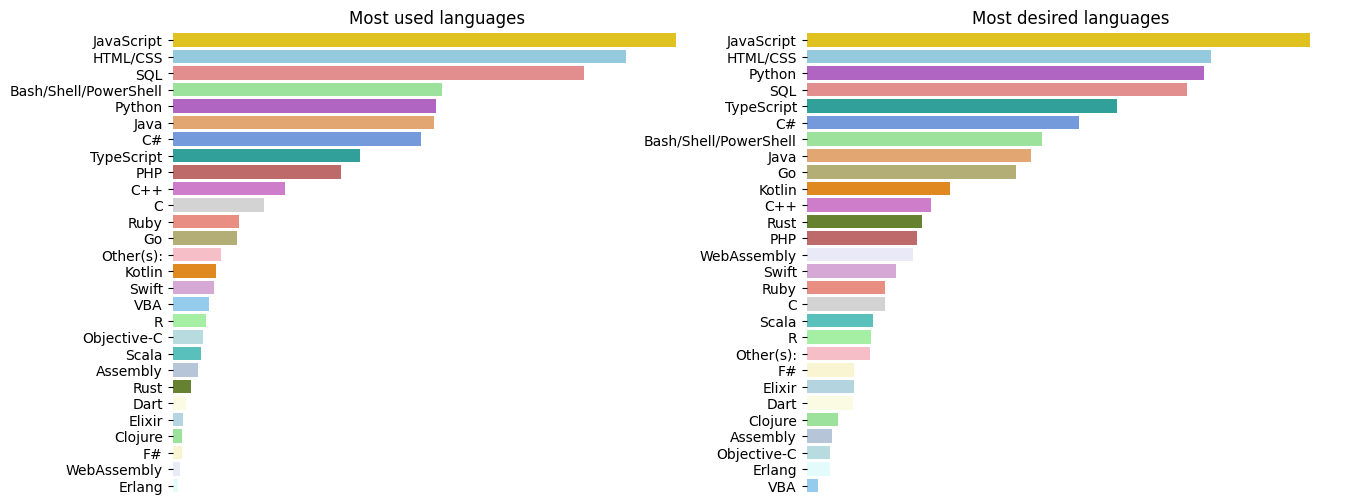

In [78]:
var=%sql select* from LanguageWorkedWith
df=var.DataFrame()
df=df["LanguageWorkedWith"].value_counts().to_frame()


var1=%sql select* from LanguageDesireNextYear
df1=var1.DataFrame()
df1=df1["LanguageDesireNextYear"].value_counts().to_frame()

# Color assignment dictionary
mi_paleta = {
    "JavaScript": "gold",
    "HTML/CSS": "skyblue",
    "SQL": "lightcoral",
    "Bash/Shell/PowerShell": "lightgreen",
    "Python": "mediumorchid",
    "Java": "sandybrown",
    "C#": "cornflowerblue",
    "TypeScript": "lightseagreen",
    "PHP": "indianred",
    "C++": "orchid",
    "C": "lightgray",
    "Ruby": "salmon",
    "Go": "darkkhaki",
    "Other(s):": "lightpink",
    "Kotlin": "darkorange",
    "Swift": "plum",
    "VBA": "lightskyblue",
    "R": "palegreen",
    "Objective-C": "powderblue",
    "Scala": "mediumturquoise",
    "Assembly": "lightsteelblue",
    "Rust": "olivedrab",
    "Dart": "lightyellow",
    "Elixir": "lightblue",
    "Clojure": "lightgreen",
    "F#": "lemonchiffon",
    "WebAssembly": "lavender",
    "Erlang": "lightcyan"
}


fig = plt.figure(figsize=(15, 6))

axs1=fig.add_subplot(1,2,1) 

sns.barplot(data=df,x="count",y="LanguageWorkedWith",hue="LanguageWorkedWith",palette=mi_paleta,ax=axs1)
axs1.set_title("Most used languages")
plt.ylabel("")
axs1.spines['top'].set_visible(False)
axs1.spines['right'].set_visible(False)
axs1.spines['bottom'].set_visible(False)
axs1.spines['left'].set_visible(False)
axs1.set_xticks([])
axs1.set_xlabel("")

axs2=fig.add_subplot(1,2,2)

sns.barplot(data=df1,x="count",y="LanguageDesireNextYear",hue="LanguageDesireNextYear",palette=mi_paleta,ax=axs2)
axs2.set_title("Most desired languages")
plt.ylabel("")
axs2.spines['top'].set_visible(False)
axs2.spines['right'].set_visible(False)
axs2.spines['bottom'].set_visible(False)
axs2.spines['left'].set_visible(False)
axs2.set_xticks([])
axs2.set_xlabel("");

JS, HTML/CSS, and SQL are the most used.  
Python and TypeScript are increasing in trend for the next year.  
PowerShell is losing popularity.  
Web developers are still in demand.  
SQL is still required in companies.  
The increase in Python is mainly due to AI and ML.  

 * sqlite:///m4_survey_data.sqlite
Done.
 * sqlite:///m4_survey_data.sqlite
Done.


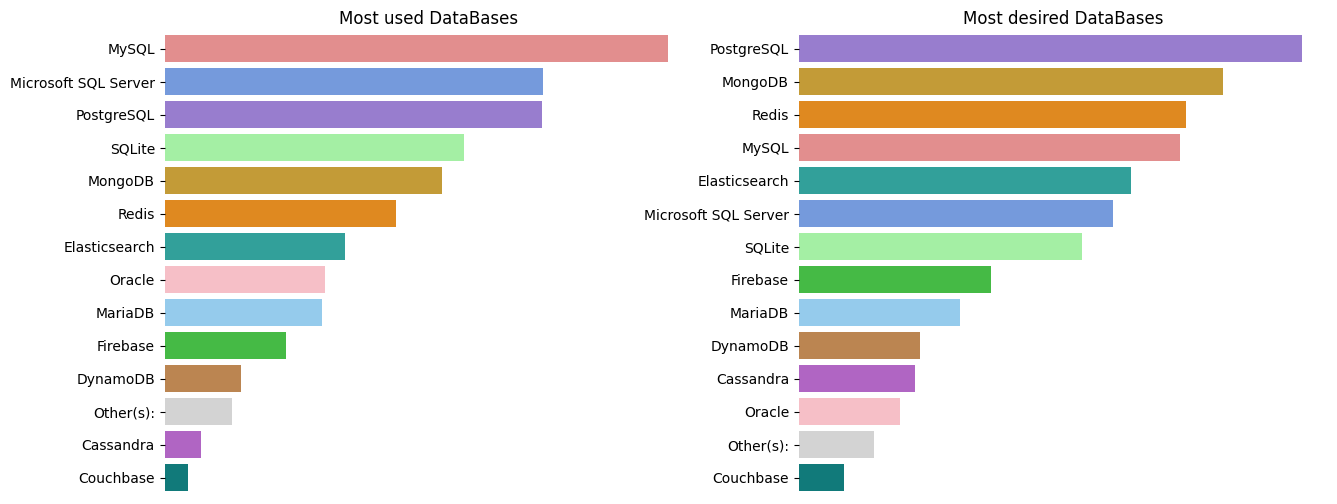

In [79]:
var=%sql select* from DatabaseWorkedWith
df=var.DataFrame()
df=df["DatabaseWorkedWith"].value_counts().to_frame()


var1=%sql select* from DatabaseDesireNextYear
df1=var1.DataFrame()
df1=df1["DatabaseDesireNextYear"].value_counts().to_frame()

# Color assignment dictionary
mi_paleta={
    "MySQL": "lightcoral",
    "Microsoft SQL Server": "cornflowerblue",
    "PostgreSQL": "mediumpurple",
    "SQLite": "palegreen",
    "MongoDB": "goldenrod",
    "Redis": "darkorange",
    "Elasticsearch": "lightseagreen",
    "Oracle": "lightpink",
    "MariaDB": "lightskyblue",
    "Firebase": "limegreen",
    "DynamoDB": "peru",
    "Other(s):": "lightgray",
    "Cassandra": "mediumorchid",
    "Couchbase": "darkcyan"
}

fig = plt.figure(figsize=(15, 6))

axs1=fig.add_subplot(1,2,1) 

sns.barplot(data=df,x="count",y="DatabaseWorkedWith",hue="DatabaseWorkedWith",palette=mi_paleta,ax=axs1)
axs1.set_title("Most used DataBases")
plt.ylabel("")
axs1.spines['top'].set_visible(False)
axs1.spines['right'].set_visible(False)
axs1.spines['bottom'].set_visible(False)
axs1.spines['left'].set_visible(False)
axs1.set_xticks([])
axs1.set_xlabel("")

axs2=fig.add_subplot(1,2,2)

sns.barplot(data=df1,x="count",y="DatabaseDesireNextYear",hue="DatabaseDesireNextYear",palette=mi_paleta,ax=axs2)
axs2.set_title("Most desired DataBases")
plt.ylabel("")
axs2.spines['top'].set_visible(False)
axs2.spines['right'].set_visible(False)
axs2.spines['bottom'].set_visible(False)
axs2.spines['left'].set_visible(False)
axs2.set_xticks([])
axs2.set_xlabel("");

MySQL is the most used database.  
MongoDB and Redis are on the rise.  
MySQL is losing popularity for the future.  
Open-source databases continue to be preferred.  
With the increase in unstructured data, there is an increase in non-relational databases.  

 * sqlite:///m4_survey_data.sqlite
Done.
 * sqlite:///m4_survey_data.sqlite
Done.


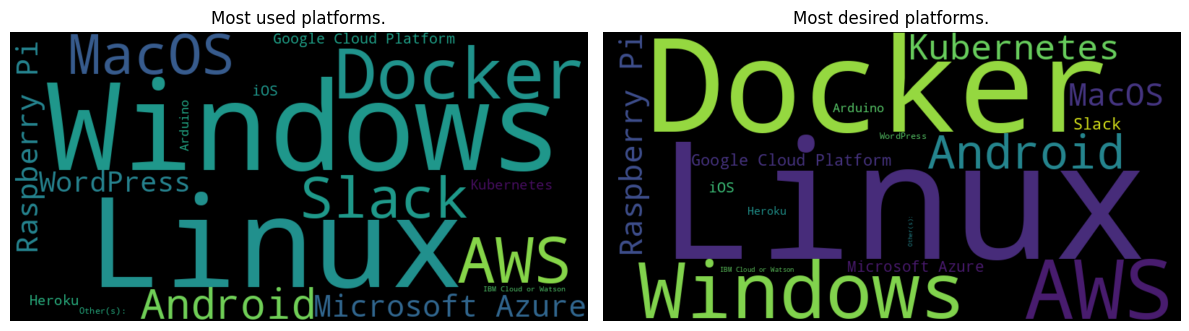

In [80]:
var=%sql select* from PlatformWorkedWith
df=var.DataFrame()

data=df["PlatformWorkedWith"].value_counts().to_dict()

wordcloud1 = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(data)


var=%sql select* from PlatformDesireNextYear
df1=var.DataFrame()

data1=df1["PlatformDesireNextYear"].value_counts().to_dict()

wordcloud2 = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(data1)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Most used platforms.')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Most desired platforms.')
plt.axis('off')

plt.tight_layout()
plt.show()

With the increase in cloud computing, we have two platforms that are increasing in popularity over Windows: Docker and AWS.

## Thanks to Plotly, a Python library, we can create dashboards. Here's an example.

This way, we can perform dynamic analysis.

In [81]:
%load_ext sql
conn=sqlite3.connect("m4_survey_data.sqlite")
%sql sqlite:///m4_survey_data.sqlite

app = dash.Dash(__name__)

#dict to gender dropdown
genders=[{'label': 'Man', 'value': 'Man'},
         {'label': 'Women', 'value': 'Woman'},
         {'label': 'All', 'value': 'All'}]

#dict/list to country dropdown
query='''
select lang.LanguageWorkedWith,G.Gender,m.Country
from LanguageWorkedWith as lang 
JOIN  Gender as G ON lang.Respondent = G.Respondent
JOIN  master as m ON lang.Respondent = m.Respondent
'''
df=pd.read_sql_query(query,conn)
countrys=df["Country"].unique()
countrys=np.insert(countrys, 0, "All")

#Dash interface
app.layout = html.Div([
    html.H1('Technology Statistics Dashboard', 
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 30}),
    html.Div([
        html.Label('Gender:'),
        dcc.Dropdown(
            id='gender-dropdown',
            options=genders,
            value='All'
        )
    ]),
    html.Br(),html.Br(),
    html.Div([
        html.Label('Age Range:'),
    dcc.RangeSlider(
        id='slider',  
        min=0,                 
        max=100,               
        step=1,                
        value=[20, 80],        
        marks={                
            0: '0',
            25: '25',
            50: '50',
            75: '75',
            100: '100'
        },
        tooltip={'always_visible': True} 
    )
    ])
    ,
    html.Div([
        html.Label('Country:'),
        dcc.Dropdown(
            id='country-dropdown',
            options=countrys,
            value=countrys[0]
        )
    ]),
    html.Div([
        dcc.Graph(id='indicator')     
    ],style={'display': 'flex','justifyContent': 'center','width': '200px', 'height': '150px'}),
    html.Div([
    html.Div([
        dcc.Graph(id='graph1'),
        dcc.Graph(id='graph2')
    ], style={'display': 'flex'}),
    html.Div([
        dcc.Graph(id='graph3'),
        dcc.Graph(id='graph4')
    ], style={'display': 'flex'}),
        html.Div([
        dcc.Graph(id='graph5')
    ])
        
    ])

    
])
#callback
@app.callback( [
               Output(component_id='graph1', component_property='figure'),
               Output(component_id='graph2', component_property='figure'),
                Output(component_id='graph3', component_property='figure'),
                Output(component_id='graph4', component_property='figure'),
                Output(component_id='indicator', component_property='figure'),
                Output(component_id='graph5', component_property='figure')
               ],
               [
                Input(component_id='gender-dropdown', component_property='value'),
                Input(component_id='slider', component_property='value'),
                Input(component_id='country-dropdown', component_property='value')
               ])
#callback function
def get_graph (gender,age,country):
    conn=sqlite3.connect("m4_survey_data.sqlite")
    %sql sqlite:///m4_survey_data.sqlite
    
    #indicador
    query0='''select m.ConvertedComp,G.Gender,m.Country,m.Age
    from master as m 
    JOIN  Gender as G ON m.Respondent = G.Respondent'''
    df0=pd.read_sql_query(query0,conn)
    
    if(gender=="All" and country == "All"):
        df0=df0.query("Age.between(@age[0], @age[1])")
        value0=df0["ConvertedComp"].mean()
        fig0 = go.Figure(go.Indicator(mode="number",value=value0,title={"text": "Average Salary"},number={"font": {"size": 50}}))
    elif(gender=="All" and country != "All"):
        df0=df0.query("Country == @country and Age.between(@age[0], @age[1])")
        value0=df0["ConvertedComp"].mean()
        fig0 = go.Figure(go.Indicator(mode="number",value=value0,title={"text": "Average Salary"},number={"font": {"size": 50}}))
    elif(gender != "All" and country == "All"):
        df0=df0.query("Gender == @gender and Age.between(@age[0], @age[1])")
        value0=df0["ConvertedComp"].mean()
        fig0 = go.Figure(go.Indicator(mode="number",value=value0,title={"text": "Average Salary"},number={"font": {"size": 50}}))
    else:
        df0=df0.query("Gender == @gender and Age.between(@age[0], @age[1]) and Country == @country")
        value0=df0["ConvertedComp"].mean()
        fig0 = go.Figure(go.Indicator(mode="number",value=value0,title={"text": "Average Salary"},number={"font": {"size": 50}}))
    
    #primer graph
    query1='''select lang.LanguageWorkedWith,G.Gender,m.Country,m.Age
    from LanguageWorkedWith as lang 
    JOIN  Gender as G ON lang.Respondent = G.Respondent
    JOIN  master as m ON lang.Respondent = m.Respondent'''
    df1=pd.read_sql_query(query1,conn)
    
    if(gender=="All" and country == "All"):
        df1=df1.query("Age.between(@age[0], @age[1])")
        df1=df1["LanguageWorkedWith"].value_counts().reset_index()
        fig1 = px.bar(df1, x='count', y='LanguageWorkedWith', color='LanguageWorkedWith', title='Most Used Languages',labels={'count':'', 'LanguageWorkedWith':'Language'})
        fig1.update_layout(showlegend=False)
        fig1.update_xaxes(showticklabels=False)
        fig1.update_layout(height=600, width=700)
        fig1.update_layout(plot_bgcolor='white')
    elif(gender=="All" and country != "All"):
        df1=df1.query("Country == @country and Age.between(@age[0], @age[1])")
        df1=df1["LanguageWorkedWith"].value_counts().reset_index()
        fig1 = px.bar(df1, x='count', y='LanguageWorkedWith', color='LanguageWorkedWith', title='Most Used Languages',labels={'count':'', 'LanguageWorkedWith':'Language'})
        fig1.update_layout(showlegend=False)
        fig1.update_xaxes(showticklabels=False)
        fig1.update_layout(height=600, width=700)
        fig1.update_layout(plot_bgcolor='white')
    elif(gender != "All" and country == "All"):
        df1=df1.query("Gender == @gender and Age.between(@age[0], @age[1])")
        df1=df1["LanguageWorkedWith"].value_counts().reset_index()
        fig1 = px.bar(df1, x='count', y='LanguageWorkedWith', color='LanguageWorkedWith', title='Most Used Languages',labels={'count':'', 'LanguageWorkedWith':'Language'})
        fig1.update_layout(showlegend=False)
        fig1.update_xaxes(showticklabels=False)
        fig1.update_layout(height=600, width=700)
        fig1.update_layout(plot_bgcolor='white')
    else:
        df1=df1.query("Gender == @gender and Age.between(@age[0], @age[1]) and Country == @country")
        df1=df1["LanguageWorkedWith"].value_counts().reset_index()
        fig1 = px.bar(df1, x='count', y='LanguageWorkedWith', color='LanguageWorkedWith', title='Most Used Languages',labels={'count':'', 'LanguageWorkedWith':'Language'})
        fig1.update_layout(showlegend=False)
        fig1.update_xaxes(showticklabels=False)
        fig1.update_layout(height=600, width=700)
        fig1.update_layout(plot_bgcolor='white')
        
            
    #segundo graph
    query2='''select db.DatabaseWorkedWith,G.Gender,m.Country,m.Age
    from DatabaseWorkedWith as db 
    JOIN  Gender as G ON db.Respondent = G.Respondent
    JOIN  master as m ON db.Respondent = m.Respondent'''
    df2=pd.read_sql_query(query2,conn)
    
    if(gender=="All" and country == "All"):
        df2=df2.query("Age.between(@age[0], @age[1])")
        df2=df2["DatabaseWorkedWith"].value_counts().reset_index()
        fig2 = px.bar(df2, x='count', y='DatabaseWorkedWith', color="DatabaseWorkedWith", title='Most Used DataBases',labels={'count':'', 'DatabaseWorkedWith':'DataBase'})
        fig2.update_layout(showlegend=False)
        fig2.update_xaxes(showticklabels=False)
        fig2.update_layout(height=600, width=700)
        fig2.update_layout(plot_bgcolor='white')    
    elif(gender=="All" and country != "All"):
        df2=df2.query("Country == @country and Age.between(@age[0], @age[1])")
        df2=df2["DatabaseWorkedWith"].value_counts().reset_index()
        fig2 = px.bar(df2, x='count', y='DatabaseWorkedWith', color="DatabaseWorkedWith", title='Most Used DataBases',labels={'count':'', 'DatabaseWorkedWith':'DataBase'})
        fig2.update_layout(showlegend=False)
        fig2.update_xaxes(showticklabels=False)
        fig2.update_layout(height=600, width=700)
        fig2.update_layout(plot_bgcolor='white') 
    elif(gender != "All" and country == "All"):
        df2=df2.query("Gender == @gender and Age.between(@age[0], @age[1])")
        df2=df2["DatabaseWorkedWith"].value_counts().reset_index()
        fig2 = px.bar(df2, x='count', y='DatabaseWorkedWith', color="DatabaseWorkedWith", title='Most Used DataBases',labels={'count':'', 'DatabaseWorkedWith':'DataBase'})
        fig2.update_layout(showlegend=False)
        fig2.update_xaxes(showticklabels=False)
        fig2.update_layout(height=600, width=700)
        fig2.update_layout(plot_bgcolor='white') 
    else:
        df2=df2.query("Gender == @gender and Age.between(@age[0], @age[1]) and Country == @country")
        df2=df2["DatabaseWorkedWith"].value_counts().reset_index()
        fig2 = px.bar(df2, x='count', y='DatabaseWorkedWith', color="DatabaseWorkedWith", title='Most Used DataBases',labels={'count':'', 'DatabaseWorkedWith':'DataBase'})
        fig2.update_layout(showlegend=False)
        fig2.update_xaxes(showticklabels=False)
        fig2.update_layout(height=600, width=700)
        fig2.update_layout(plot_bgcolor='white') 

    #tercer graph  
    query3='''select dev.DevEnviron,G.Gender,m.Country,m.Age
    from DevEnviron as dev 
    JOIN  Gender as G ON dev.Respondent = G.Respondent
    JOIN  master as m ON dev.Respondent = m.Respondent'''
    df3=pd.read_sql_query(query3,conn)
    
    if(gender=="All" and country == "All"):
        df3=df3.query("Age.between(@age[0], @age[1])")
        df3=df3["DevEnviron"].value_counts().reset_index()
        fig3=px.treemap(df3,path=["DevEnviron"],values="count",title="Most Common IDEs")
        fig3.update_layout(showlegend=False)
        fig3.update_xaxes(showticklabels=False)
        fig3.update_layout(height=600, width=700)
        fig3.update_layout(plot_bgcolor='white')   
    elif(gender=="All" and country != "All"):
        df3=df3.query("Country == @country and Age.between(@age[0], @age[1])")
        df3=df3["DevEnviron"].value_counts().reset_index()
        fig3=px.treemap(df3,path=["DevEnviron"],values="count",title="Most Common IDEs")
        fig3.update_layout(showlegend=False)
        fig3.update_xaxes(showticklabels=False)
        fig3.update_layout(height=600, width=700)
        fig3.update_layout(plot_bgcolor='white')  
    elif(gender != "All" and country == "All"):
        df3=df3.query("Gender == @gender and Age.between(@age[0], @age[1])")
        df3=df3["DevEnviron"].value_counts().reset_index()
        fig3=px.treemap(df3,path=["DevEnviron"],values="count",title="Most Common IDEs")
        fig3.update_layout(showlegend=False)
        fig3.update_xaxes(showticklabels=False)
        fig3.update_layout(height=600, width=700)
        fig3.update_layout(plot_bgcolor='white')  
    else:
        df3=df3.query("Gender == @gender and Age.between(@age[0], @age[1]) and Country == @country")
        df3=df3["DevEnviron"].value_counts().reset_index()
        fig3=px.treemap(df3,path=["DevEnviron"],values="count",title="Most Common IDEs")
        fig3.update_layout(showlegend=False)
        fig3.update_xaxes(showticklabels=False)
        fig3.update_layout(height=600, width=700)
        fig3.update_layout(plot_bgcolor='white') 

    
    #cuarto graph
    query4='''select dev.DevType,G.Gender,m.Country,m.Age
    from DevType as dev 
    JOIN  Gender as G ON dev.Respondent = G.Respondent
    JOIN  master as m ON dev.Respondent = m.Respondent'''

    df4=pd.read_sql_query(query4,conn)
    
    if(gender=="All" and country == "All"):
        df4=df4.query("Age.between(@age[0], @age[1])")
        df4=df4["DevType"].value_counts().reset_index()
        fig4= px.bar(df4, x='count', y='DevType', color="DevType", title='Most Common IT Jobs',labels={'count':'', 'DevType':'Developer Type'})
        fig4.update_layout(showlegend=False)
        fig4.update_xaxes(showticklabels=False)
        fig4.update_layout(height=600, width=800)
        fig4.update_layout(plot_bgcolor='white')   
    elif(gender=="All" and country != "All"):
        df4=df4.query("Country == @country and Age.between(@age[0], @age[1])")
        df4=df4["DevType"].value_counts().reset_index()
        fig4= px.bar(df4, x='count', y='DevType', color="DevType", title='Most Common IT Jobs',labels={'count':'', 'DevType':'Developer Type'})
        fig4.update_layout(showlegend=False)
        fig4.update_xaxes(showticklabels=False)
        fig4.update_layout(height=600, width=800)
        fig4.update_layout(plot_bgcolor='white')   
    elif(gender != "All" and country == "All"):
        df4=df4.query("Gender == @gender and Age.between(@age[0], @age[1])")
        df4=df4["DevType"].value_counts().reset_index()
        fig4= px.bar(df4, x='count', y='DevType', color="DevType", title='Most Common IT Jobs',labels={'count':'', 'DevType':'Developer Type'})
        fig4.update_layout(showlegend=False)
        fig4.update_xaxes(showticklabels=False)
        fig4.update_layout(height=600, width=800)
        fig4.update_layout(plot_bgcolor='white')   
    else:
        df4=df4.query("Gender == @gender and Age.between(@age[0], @age[1]) and Country == @country")
        df4=df4["DevType"].value_counts().reset_index()
        fig4= px.bar(df4, x='count', y='DevType', color="DevType", title='Most Common IT Jobs',labels={'count':'', 'DevType':'Developer Type'})
        fig4.update_layout(showlegend=False)
        fig4.update_xaxes(showticklabels=False)
        fig4.update_layout(height=600, width=800)
        fig4.update_layout(plot_bgcolor='white')
    
    #choropleth map
    
    query5='''select m.ConvertedComp,G.Gender,m.Country,m.Age
    from master as m 
    JOIN  Gender as G ON m.Respondent = G.Respondent'''
    df5=pd.read_sql_query(query5,conn)
    df5=df5.query("Country not in ('Timor-Leste','Swaziland','Somalia','Kuwait','Liechtenstein') and ConvertedComp <= 250000")
    
    if(gender=="All"):
        df5=df5.query("Age.between(@age[0], @age[1])")
        df5=df5.groupby("Country",as_index=False)["ConvertedComp"].median().round(0)

        fig5 = px.choropleth(
            df5,
            locations='Country',  
            locationmode='country names',  
            color='ConvertedComp',  
            color_continuous_scale=px.colors.colorbrewer.Blues,
            title='Salary per country'
        )
        fig5.update_coloraxes(colorbar_title='Salary')
        fig5.update_traces(hovertemplate='<b>%{location}</b><br>Salary: $%{z}')
        fig5.update_layout(
                width=1550, 
                height=600  
            )
    else:
        df5=df5.query("Gender == @gender and Age.between(@age[0], @age[1])")
        df5=df5.groupby("Country",as_index=False)["ConvertedComp"].median().round(0)

        fig5 = px.choropleth(
            df5,
            locations='Country',  
            locationmode='country names',  
            color='ConvertedComp',  
            color_continuous_scale=px.colors.colorbrewer.Blues,
            title='Salary per country'
        )
        fig5.update_coloraxes(colorbar_title='Salary')
        fig5.update_traces(hovertemplate='<b>%{location}</b><br>Salary: $%{z}')
        fig5.update_layout(
                width=1550,  
                height=600  
            )
    
    return(fig1,fig2,fig3,fig4,fig0,fig5)



if __name__ == '__main__':
    app.run_server(debug=True)

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [82]:
conn.close() #cerramos porq sino sigue gastando recursos la conexion a la bd